In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

from scipy.stats import boxcox


In [69]:
data=pd.read_csv(r"C:\Users\91958\Desktop\Shubhs\Segmentation Project\customer_segemtation.csv")
data.head()

,Unnamed: 0,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [70]:
data.columns

Index(['Unnamed: 0', 'RENTROLLDATE', 'FACILITYID', 'UNITNUMBER',
       'UNITREFLECTIONS', 'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS',
       'PERSONID', 'RESIDENTID', 'ADMISSIONDATE', 'DISCHARGEDATE',
       'DISCHARGED', 'SHORTTERMSTAY', 'ONHOLD', 'ONHOLDREASON',
       'ROOMBOARDRATEPERIOD', 'SERVICELEVELRATEPERIOD', 'MEDADMINRATEPERIOD',
       'RATECODE', 'OCCUPANCYTYPE', 'PAYOR', 'ROOMBOARDRATE',
       'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE',
       'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE'],
      dtype='object')

In [71]:
data.drop(data.columns[0],axis=1,inplace=True)

In [72]:
data.head(5)

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,04-11-2021,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,17-06-2022,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,31-08-2022,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,17-09-2019,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,01-10-2021,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [73]:
data.tail(5)

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
492361,22-03-2023,39,131,y,n,n,Studio,270584.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492362,22-03-2023,39,134,y,n,n,Studio,266941.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492363,22-03-2023,39,230,n,n,n,Two Bed Room,237991.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492364,22-03-2023,39,408,n,n,n,Two Bed Room,282193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492365,22-03-2023,67,235,y,y,n,Studio Deluxe,224801.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,277.0,0,0


In [74]:
data.drop('PERSONID',axis=1,inplace=True)

In [75]:
data.dtypes


RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
ROOMBOARDRATEPERIOD        object
SERVICELEVELRATEPERIOD     object
MEDADMINRATEPERIOD         object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE       float64
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [76]:
data.describe()

,FACILITYID,RESIDENTID,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
count,492366.000000,380830.000000,492366.000000,492366.000000,492366.000000,491791.000000,492366.000000,492366.000000
mean,45.294628,20587.488612,419.179175,50.954250,26.533671,288.345656,40.015568,21.105606
std,22.570691,3314.740002,1244.395693,229.591765,127.935775,85.753727,38.496767,17.796414
min,1.000000,657.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,19463.000000,98.000000,0.000000,0.000000,278.000000,0.000000,0.000000
50%,43.000000,21547.000000,225.000000,0.000000,0.000000,313.000000,47.000000,30.000000
75%,66.000000,22877.000000,300.000000,47.000000,21.000000,339.000000,79.000000,39.000000
max,76.000000,24265.000000,11391.000000,2557.000000,1237.000000,481.000000,115.000000,46.000000


In [77]:
#checking for duplicated Values
data.duplicated().sum()

0

In [78]:
#check for Null Values
data.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
UNITREFLECTIONS                0
UNITSERENADE                   0
UNITINDEPENDENT                0
UNITCLASS                      0
RESIDENTID                111536
ADMISSIONDATE             111536
DISCHARGEDATE             468530
DISCHARGED                111536
SHORTTERMSTAY               2417
ONHOLD                    111536
ONHOLDREASON              113060
ROOMBOARDRATEPERIOD       111536
SERVICELEVELRATEPERIOD    111536
MEDADMINRATEPERIOD        111536
RATECODE                  111536
OCCUPANCYTYPE             111536
PAYOR                     111536
ROOMBOARDRATE                  0
SERVICELEVELRATE               0
MEDADMINRATE                   0
ROOMBOARDMARKETRATE          575
SERVICELEVELMARKETRATE         0
MEDADMINMARKETRATE             0
dtype: int64

DATA CLEANING

In [79]:
#Dropping Servicelevelrate period and Medadminrateperiod period because we dont need it
data.drop(['MEDADMINRATEPERIOD','SERVICELEVELRATEPERIOD'],axis=1,inplace=True)


In [80]:
data.rename(columns={'ROOMBOARDRATEPERIOD':'RATEPERIOD'},inplace=True)

In [81]:
data.head()

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,RATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [82]:
#Calculating mean of ROOMBOARDMARKETRATE when 'RATEPERIOD' is 'daily'
dmean=data[data['RATEPERIOD']=='daily']['ROOMBOARDRATE'].mean

In [83]:
#Filling null values of remaining columns with appropraite strategy.

data['ROOMBOARDMARKETRATE']=data['ROOMBOARDMARKETRATE'].fillna(dmean)
data['SHORTTERMSTAY']=data['SHORTTERMSTAY'].fillna(data['SHORTTERMSTAY'].mode()[0])

In [84]:
data.dtypes

RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
RATEPERIOD                 object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE        object
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [85]:
data['ROOMBOARDMARKETRATE'] = pd.to_numeric(data['ROOMBOARDMARKETRATE'], errors='coerce')


In [86]:
data.dtypes

RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
RATEPERIOD                 object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE       float64
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [87]:
data.groupby('RATEPERIOD')['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE'].mean()

,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE
RATEPERIOD,,,
daily,241.341674,25.604589,11.498334
monthly,6602.723327,877.857579,494.125972


In [88]:
data.groupby('RATEPERIOD')['ROOMBOARDMARKETRATE','SERVICELEVELMARKETRATE','MEDADMINMARKETRATE'].mean()

,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
RATEPERIOD,,,
daily,280.852263,51.916562,26.955939
monthly,282.619693,48.077962,33.960436


There is a huge variance in rates for residents, when the 'RATEPERIOD' is monthly, so standardizing it as daily rate.

In [89]:
#Dividing the rate columns for residents by 30 when 'RATEPERIOD' is monthly.

ratecol=['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE']

for col in ratecol:
    data.loc[data['RATEPERIOD']=='monthly',col]=data.loc[data['RATEPERIOD']=='monthly',col]/30

In [90]:
data.groupby('RATEPERIOD')['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE'].mean()

,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE
RATEPERIOD,,,
daily,241.341674,25.604589,11.498334
monthly,220.090778,29.261919,16.470866


In [91]:
#Adding 'Overallboardrate' column representing the total amount the resident was charged for that date.
data['Overallboardrate']=data['ROOMBOARDRATE']+data['SERVICELEVELRATE']+data['MEDADMINRATE']
data['Overallmarketboardrate']=data['ROOMBOARDMARKETRATE']+data['SERVICELEVELMARKETRATE']+data['MEDADMINMARKETRATE']

In [92]:
data.head()

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,Overallboardrate,Overallmarketboardrate
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,individual,Private,210.0,0.0,0.0,265.0,103,46,210.0,414.0
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,individual,Private,339.0,40.0,39.0,265.0,40,39,418.0,344.0
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,individual,Private,225.0,0.0,0.0,240.0,55,39,225.0,334.0
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,individual,Private,239.0,55.0,46.0,240.0,55,46,340.0,341.0
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,individual,Private,236.0,0.0,0.0,240.0,110,39,236.0,389.0


In [93]:
#Adding 'Unit Segemnt' column representing all the possible combinations of UNITREFLECTIONS,'UNITSERENADE','UNITINDEPENDENT'
data['Unit_segment']=data['UNITREFLECTIONS']+'_'+data['UNITSERENADE']+'_'+data['UNITINDEPENDENT']

In [94]:
data['Unit_segment'].value_counts()

n_n_n    291140
y_n_n     93004
n_y_n     57205
y_y_n     41323
n_n_y      9694
Name: Unit_segment, dtype: int64

We get 5 out of 8 possible combinations . It can be also seen that the unit can only be independent if it is neither a 'memory care' as well not part of 'luxury program'

In [95]:
data.columns

Index(['RENTROLLDATE', 'FACILITYID', 'UNITNUMBER', 'UNITREFLECTIONS',
       'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS', 'RESIDENTID',
       'ADMISSIONDATE', 'DISCHARGEDATE', 'DISCHARGED', 'SHORTTERMSTAY',
       'ONHOLD', 'ONHOLDREASON', 'RATEPERIOD', 'RATECODE', 'OCCUPANCYTYPE',
       'PAYOR', 'ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE',
       'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE',
       'Overallboardrate', 'Overallmarketboardrate', 'Unit_segment'],
      dtype='object')


# SEGMENTATION

In [96]:
#Creating a new dataframe with columns specific for resident segmentation.

datacustomer=data[['RENTROLLDATE','RESIDENTID','ADMISSIONDATE', 'DISCHARGEDATE','DISCHARGED','SHORTTERMSTAY','RATEPERIOD','OCCUPANCYTYPE','PAYOR', 'Overallboardrate']].copy()



In [97]:
datacustomer.head()


,RENTROLLDATE,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
0,04-01-2023,21867.0,04-11-2021,NaN,n,no,daily,individual,Private,210.0
1,04-01-2023,22840.0,17-06-2022,NaN,n,no,daily,individual,Private,418.0
2,04-01-2023,23195.0,31-08-2022,NaN,n,no,daily,individual,Private,225.0
3,04-01-2023,19752.0,17-09-2019,NaN,n,no,daily,individual,Private,340.0
4,04-01-2023,21744.0,01-10-2021,NaN,n,no,daily,individual,Private,236.0


In [98]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID          111536
ADMISSIONDATE       111536
DISCHARGEDATE       468530
DISCHARGED          111536
SHORTTERMSTAY            0
RATEPERIOD          111536
OCCUPANCYTYPE       111536
PAYOR               111536
Overallboardrate         0
dtype: int64

The null values in 'RESIDENTID' here represent that the unit was vacant for that date , so the corresponding columns have same null values, which is not useful for customer segmentation , so these rows can be dropped.

In [99]:
datacustomer=datacustomer[datacustomer['RESIDENTID'].notnull()].copy()

In [100]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID               0
ADMISSIONDATE            0
DISCHARGEDATE       356994
DISCHARGED               0
SHORTTERMSTAY            0
RATEPERIOD               0
OCCUPANCYTYPE            0
PAYOR                    0
Overallboardrate         0
dtype: int64

In [101]:
datacustomer['DISCHARGEDATE'].fillna(pd.NaT,inplace=True)

In [102]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID               0
ADMISSIONDATE            0
DISCHARGEDATE       356994
DISCHARGED               0
SHORTTERMSTAY            0
RATEPERIOD               0
OCCUPANCYTYPE            0
PAYOR                    0
Overallboardrate         0
dtype: int64

In [103]:
#To convert into pandas datetime object.
col_date=['RENTROLLDATE','ADMISSIONDATE','DISCHARGEDATE']
for col in col_date:
    datacustomer[col] = pd.to_datetime(datacustomer[col])

In [104]:
#Sorting the dataframe according to rent roll date in descending order
datacustomer=datacustomer.sort_values('RENTROLLDATE',ascending=False)

In [105]:
#Grouping the dataset by 'RESIDENTID' and picking the first entry for each resident id.
unit_Res=datacustomer.groupby('RESIDENTID').first()
unit_Res

,RENTROLLDATE,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
RESIDENTID,,,,,,,,,
657.0,2023-12-06,2003-09-30,NaT,n,no,daily,individual,Medicaid,130.0
2476.0,2023-12-06,2021-12-19,NaT,n,no,daily,individual,Medicaid,118.0
2774.0,2023-12-02,2002-01-11,2023-05-03,n,no,daily,individual,Private,170.0
3377.0,2023-12-06,2007-11-21,NaT,n,no,daily,individual,Private,191.0
3388.0,2023-12-06,2018-07-16,NaT,n,no,daily,individual,Private,292.0
...,...,...,...,...,...,...,...,...,...
24257.0,2023-06-14,2023-06-14,NaT,n,no,daily,individual,Private,300.0
24259.0,2023-06-14,2023-06-13,NaT,n,no,daily,individual,Private,290.0
24260.0,2023-12-06,2023-09-06,NaT,n,no,daily,individual,Private,397.0


In the dataframe 'unit_res' , each row represents a unique residentid from the dataset , and "RENTROLLDATE" represents the latest date for which the entry was recorded for that resident.¶

In [106]:
#Adding mean of 'Overallboardrate' for each resident.
unit_Res['Overallboardrate']=datacustomer.groupby('RESIDENTID')['Overallboardrate'].mean().round() 

In [107]:
unit_Res

,RENTROLLDATE,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
RESIDENTID,,,,,,,,,
657.0,2023-12-06,2003-09-30,NaT,n,no,daily,individual,Medicaid,130.0
2476.0,2023-12-06,2021-12-19,NaT,n,no,daily,individual,Medicaid,117.0
2774.0,2023-12-02,2002-01-11,2023-05-03,n,no,daily,individual,Private,173.0
3377.0,2023-12-06,2007-11-21,NaT,n,no,daily,individual,Private,191.0
3388.0,2023-12-06,2018-07-16,NaT,n,no,daily,individual,Private,292.0
...,...,...,...,...,...,...,...,...,...
24257.0,2023-06-14,2023-06-14,NaT,n,no,daily,individual,Private,300.0
24259.0,2023-06-14,2023-06-13,NaT,n,no,daily,individual,Private,290.0
24260.0,2023-12-06,2023-09-06,NaT,n,no,daily,individual,Private,397.0


The 'ADMISSIONDATE' date represents the date the candidate was admitted to the facility . so using it and latest 'RENTROLLDATE' for a particular "RESIDENTID' we can determine the number of days they have stayed until the latest date in dataset which is '2023-06-14'. If a resident leaves the facility before , it is represented by 'y' in 'DISCHARGED' column.

In [108]:
#Adding length of stay in dataset.
unit_Res['Length of stay']=((unit_Res['RENTROLLDATE']-unit_Res['ADMISSIONDATE']).dt.days)+1

'Length of stay' include both admission date and last 'RENTROLLDATE"

In [109]:
#Dropping irrelevant columns for resident segmentation.
unit_Res.drop(['RENTROLLDATE','ADMISSIONDATE','DISCHARGEDATE'],axis=1,inplace=True)
unit_Res.rename(columns={'DISCHARGED':'Left the facility'},inplace=True)

In [110]:
unit_Res

,Left the facility,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate,Length of stay
RESIDENTID,,,,,,,
657.0,n,no,daily,individual,Medicaid,130.0,7373
2476.0,n,no,daily,individual,Medicaid,117.0,718
2774.0,n,no,daily,individual,Private,173.0,7996
3377.0,n,no,daily,individual,Private,191.0,5860
3388.0,n,no,daily,individual,Private,292.0,1970
...,...,...,...,...,...,...,...
24257.0,n,no,daily,individual,Private,300.0,1
24259.0,n,no,daily,individual,Private,290.0,2
24260.0,n,no,daily,individual,Private,397.0,92


In [111]:
unit_Res['PAYOR'].value_counts()

Private     2529
Medicaid     346
PAL            3
Name: PAYOR, dtype: int64

Count value of PAL is very less so dropping that

In [112]:
unit_Res.drop(unit_Res[unit_Res['PAYOR']=='PAL'].index,inplace=True)

# SCALING AND ENCODING

In [113]:
scaled_df=unit_Res.copy()

<Axes: xlabel='Overallboardrate'>

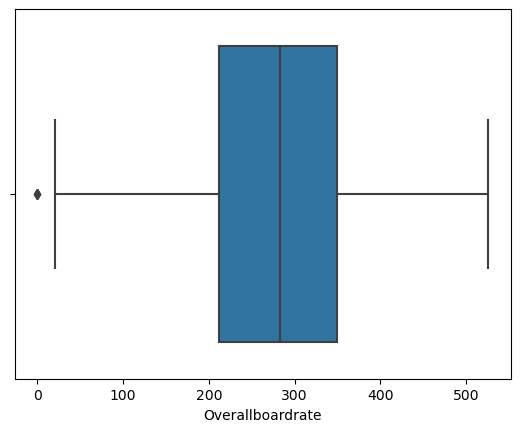

In [114]:
#Checking for outliers.
sns.boxplot(data=scaled_df,x='Overallboardrate')

<Axes: xlabel='Length of stay'>

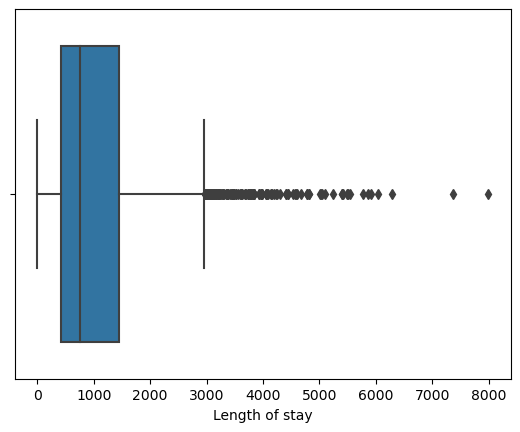

In [115]:
sns.boxplot(data=scaled_df,x='Length of stay')

In [116]:
#Transforming outliers for 'length of stay'
columnData = scaled_df['Length of stay'].values

#Transforming into normal data data using BOCX COX
transformed_data, lambda_value = boxcox(columnData)

# Create a new column in the DataFrame with the transformed data
scaled_df['Length of stay']=transformed_data

<Axes: xlabel='Length of stay'>

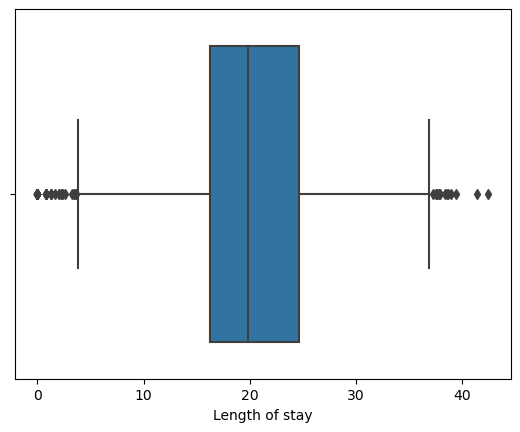

In [117]:
sns.boxplot(data=scaled_df,x='Length of stay')

In [118]:
#CATEGORICAL DATA TO BINARY USING LABEL ENCODING
cat_col=['Left the facility', 'SHORTTERMSTAY', 'RATEPERIOD','PAYOR']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in cat_col:
    scaled_df[col]=LE.fit_transform(scaled_df[col])

In [119]:
#One-Hot encoding.
col_encode=['OCCUPANCYTYPE']
scaled_df=pd.get_dummies(scaled_df,columns=col_encode,drop_first=True)

In [120]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler

#list of numerical columns
col_num=['Overallboardrate','Length of stay']

SS=StandardScaler()
scaled_df[col_num]=SS.fit_transform(scaled_df[col_num])

In [121]:
scaled_df

,Left the facility,SHORTTERMSTAY,RATEPERIOD,PAYOR,Overallboardrate,Length of stay,OCCUPANCYTYPE_individual,OCCUPANCYTYPE_semi-private
RESIDENTID,,,,,,,,
657.0,0,0,0,0,-1.462053,3.406860,1,0
2476.0,0,0,0,0,-1.591473,-0.128738,1,0
2774.0,0,0,0,1,-1.033970,3.577682,1,0
3377.0,0,0,0,1,-0.854773,2.944213,1,0
3388.0,0,0,0,1,0.150723,1.120116,1,0
...,...,...,...,...,...,...,...,...
24257.0,0,0,0,1,0.230366,-3.282688,1,0
24259.0,0,0,0,1,0.130812,-3.158781,1,0
24260.0,0,0,0,1,1.196041,-1.784630,1,0


#Dimensionality Reduction using PCA
